In [97]:
import numpy as np
import pandas as pd
import cv2
import os 
import math as m
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter


In [98]:
file_path = f'{os.getcwd()}/MNIST/data/'
file_path

'/home/m_rumi/Documents/Python Projects/Machine Learning/MNIST/data/'

In [99]:
df = pd.read_csv(file_path+'data.dat', sep=r'\s{3}', engine='python',header=None)
labeldf = pd.read_csv(file_path+'label.dat', sep=r'\s{3}', engine='python',header=None)
# Perform operations on the DataFrame as needed
# For example, you can print the first few rows
print(df.shape)


(784, 1990)


In [100]:
feature_means = np.mean(df, axis=0)
feature_stds = np.std(df, axis=0)
X = (df - feature_means) / feature_stds


In [101]:
X.shape

(784, 1990)

In [102]:

true_labels = labeldf.values.flatten()
# Map true labels to the range of output labels
true_labels_mapped = np.where(true_labels == 2, 0, 1)
true_labels_mapped.shape

(1990,)

In [103]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X.T)
X_pca.shape

(1990, 4)

In [104]:
X_pca.shape

(1990, 4)

In [105]:
df[1]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Name: 1, Length: 784, dtype: float64

In [106]:
data = df.values.T
label = labeldf.values.T
data.shape

(1990, 784)

In [107]:
image_data=data.reshape(-1,28,28)
# data = np.transpose(data, (2, 0, 1))
image_data.shape

(1990, 28, 28)

In [108]:
label[1]

array([2.])

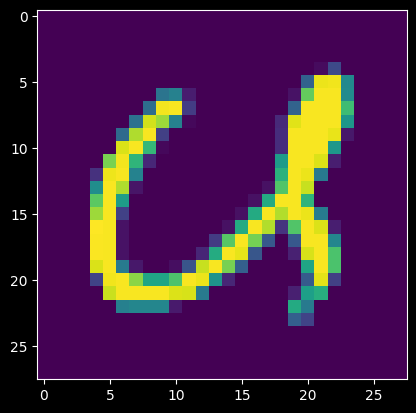

In [109]:
plt.imshow(image_data[1])


## Question 4

In [110]:
V = ['secret', 'offer', 'low', 'price', 'valued', 'customer', 'today', 'dollar','million', 'sports', 'is', 'for', 'play', 'healthy', 'pizza']
train_emails = {'spam':['million dollar offer for today', 'secret offer today', 'secret is secret' ],'ham': ['low price for valued customer', 'play secrets sports today', 'sports is healthy', 'low price pizza']}
train_emails['ham']

['low price for valued customer',
 'play secrets sports today',
 'sports is healthy',
 'low price pizza']

In [111]:
unique_vocab = dict()
for key,value in train_emails.items():
    x = list()
    for i in value:
        for c in i.split():
            x.append(c)
    x = list(set(x)) # unique words
    unique_vocab[key] = x
unique_vocab
    

{'spam': ['offer', 'for', 'is', 'secret', 'today', 'dollar', 'million'],
 'ham': ['sports',
  'low',
  'for',
  'play',
  'is',
  'pizza',
  'secrets',
  'valued',
  'healthy',
  'price',
  'today',
  'customer']}

In [112]:
def calculate_icity(data,vocab,key= 'spam'):
# Count the occurrences of each word in spam emails
    word_counts_am = Counter(word for sentence in data[key] for word in sentence.split())
    'spam'
    # Calculate the spamicity for each word
    total_am = sum(word_counts_am.values())
    dict_icity = {w.lower(): (word_counts_am.get(w,0)+1) / (total_am+ len(vocab)) for w in vocab}
    # Print the results
    

    return dict_icity
    
hamicity = calculate_icity(train_emails,V,key='ham')
spamicity = calculate_icity(train_emails,V,key='spam')

In [113]:
hamicity

{'secret': 0.03333333333333333,
 'offer': 0.03333333333333333,
 'low': 0.1,
 'price': 0.1,
 'valued': 0.06666666666666667,
 'customer': 0.06666666666666667,
 'today': 0.06666666666666667,
 'dollar': 0.03333333333333333,
 'million': 0.03333333333333333,
 'sports': 0.1,
 'is': 0.06666666666666667,
 'for': 0.06666666666666667,
 'play': 0.06666666666666667,
 'healthy': 0.06666666666666667,
 'pizza': 0.06666666666666667}

In [114]:
spamicity

{'secret': 0.15384615384615385,
 'offer': 0.11538461538461539,
 'low': 0.038461538461538464,
 'price': 0.038461538461538464,
 'valued': 0.038461538461538464,
 'customer': 0.038461538461538464,
 'today': 0.11538461538461539,
 'dollar': 0.07692307692307693,
 'million': 0.07692307692307693,
 'sports': 0.038461538461538464,
 'is': 0.07692307692307693,
 'for': 0.07692307692307693,
 'play': 0.038461538461538464,
 'healthy': 0.038461538461538464,
 'pizza': 0.038461538461538464}

In [115]:
S = len(train_emails['spam'])/(len(train_emails['spam']) + len(train_emails['ham']))
H = len(train_emails['ham'])/(len(train_emails['spam']) + len(train_emails['ham']))
S,H

(0.42857142857142855, 0.5714285714285714)

$$
P(C|X) = \frac{P(C) \cdot P(X|C)}{P(X)}
$$
### Generally, we don't consdider the denominator for maximization problems.
To get the likelihood for a message to be a spam or ham we will multiply Probability of spam/ham with the likehood of a word to be spam/ham.

# K-means

In [116]:
X.shape

(784, 1990)

In [117]:
from sklearn.cluster import KMeans

# Create an instance of KMeans with the desired number of clusters
k = 2
kmeans = KMeans(n_clusters=k)

# Fit the KMeans model to your data
kmeans.fit(X_pca)

# Get the cluster labels assigned to each data point
label = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_


/home/m_rumi/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [118]:
label.shape

(1990,)

In [119]:
misclassification_2 = np.mean(label[true_labels == 2] != 0)

# Calculate misclassification rate for digit "6"
misclassification_6 = np.mean(label[true_labels == 6] != 1)

In [120]:
misclassification_6

0.06367432150313153

In [121]:
misclassification_2

0.06782945736434108

In [126]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Load your dataset here
# X = ...

# Define the number of components (clusters) for GMM
num_components = 2

# Create an instance of GaussianMixture with EM algorithm
gmm = GaussianMixture(n_components=num_components)

# Fit the GMM model to your data
gmm.fit(X_pca)

# Get the predicted labels for your data
predicted_labels = gmm.predict(X_pca)

# Access the cluster means, covariances, and weights
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

# Compute the log-likelihood of the data under the GMM model
log_likelihood = gmm.score(X_pca)

# Evaluate the performance, e.g., misclassification rate, using true labels
# true_labels = ...
# misclassification_rate = ...

# Additional analysis or visualization of the GMM model and results
# ...



In [127]:
misclassification_2m = np.mean(predicted_labels[true_labels == 2] != 0)

# Calculate misclassification rate for digit "6"
misclassification_6m = np.mean(predicted_labels[true_labels == 6] != 1)

In [128]:
misclassification_6m

0.9926931106471816

In [129]:
misclassification_2m

0.9302325581395349